# Job Hunt Analysis

In [86]:
#!pip install geopy
#!pip install matplotlib_venn
#!pip install matplotlib_venn_wordcloud 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import *
import geopy.distance
import plotly.graph_objects as go

In [49]:
import nltk
from nltk import FreqDist
from wordcloud import WordCloud 
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn_wordcloud import venn2_wordcloud

In [3]:
df=pd.read_csv("C:\\Users\\Owner\\Downloads\\College\\Practice\\Job_Progress.csv",encoding= 'unicode_escape')

In [4]:
df.shape

(48, 23)

### Skills

In [5]:
# Convert to string
df["Skills"] = df["Skills"].astype(str)
# Convert text to lower case
df["Skills"] = df["Skills"].apply(lambda x: x.lower())
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+")
# Apply the tokenizer to each row of the reviews
skills_tokens = df["Skills"] = df["Skills"].apply(tokenizer.tokenize)

In [6]:
# Import the English stopwords directory 
stop = stopwords.words("english")
stop.extend(["years", "nan","strong","knowledge","using","etc","skills","ability","environment"])

In [39]:
# Removing stopwords from the tokens
skills_tokens = skills_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_skills = skills_tokens.astype(str).str.cat()
cleaned_skills = tokenizer.tokenize(all_skills)

In [68]:
# Get the frequency distribution of individual words in the skills
fd = FreqDist()
for word in cleaned_skills:
    fd[word] += 1

In [70]:
mc = sorted([w for w in fd.most_common(30) if len(w[0]) > 2], key=lambda x: x[1],reverse=True)

In [72]:
# Extract only the words
skills_list = [item[0] for item in mc]

### Word Cloud-Skills

In [10]:
bulb_mask = np.array(Image.open("C:/Users/Owner/Downloads/College/Practice/Job Hunt/bulb.png"))

In [11]:
# function to swap number 0 to 255 for any image
def transform_any_image_format(val):
    if val.any() == 0:
        return 255
    elif val.any() == 1 :
        return 1
    elif val.any()!=0:
        return 255
    else:
        return val
    
# Transform your mask into a new one that will work with the function:
def new_mask(image_mask):
    transformed_mask = np.ndarray((image_mask.shape[0],image_mask.shape[1]), np.int32)

    for i in range(len(image_mask)):
        transformed_mask[i] = list(map(transform_any_image_format, image_mask[i]))
    
    return transformed_mask

In [12]:
transformed_bulb_mask=new_mask(bulb_mask)

In [13]:
# Create a word cloud image
wc = WordCloud(font_path='C:/Users/Owner/Downloads/College/Capstone Project/cabinsketch/CabinSketch-Bold.ttf',background_color="black", max_words=1000, 
               mask=transformed_bulb_mask, contour_width=3,width=1600,height=900,colormap=matplotlib.cm.inferno).generate(str(skills_list))

(-0.5, 1785.5, 2399.5, -0.5)

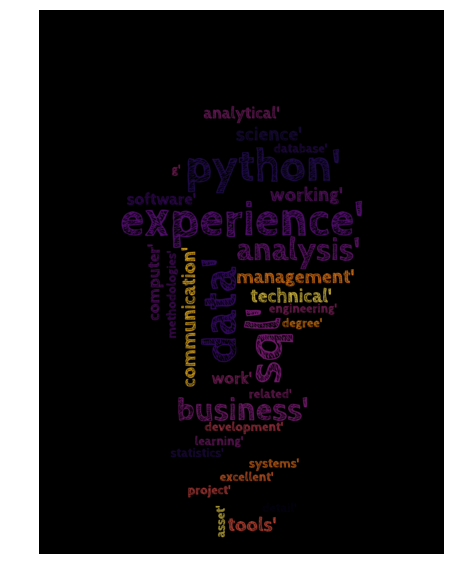

In [14]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [106]:
wc.to_file("C:\\Users\\Owner\\Downloads\\College\\Practice\\wordcloud_bulb.png")

### Location

In [15]:
df.columns

Index(['ID', 'Company', 'Longitude', 'Latitude', 'Portal', 'Company Addresss',
       'Position', 'Website', 'Password Required', 'userId', 'Password',
       'Status', 'Cover Letter', 'Applied On', 'Result Date', 'Job Type',
       'Area', 'Province', 'Country', 'Skills', 'Responsibilities', 'Pay',
       'Benefits'],
      dtype='object')

In [16]:
#restricting job search to Vancouver,BC ,Canada
map_df=df[(df['Country']=='Canada') & (df['Province']=='BC') & (df['Area']=='Vancouver')]

In [17]:
#Calculating the max and min Latitude/ Longitude
BBox = (map_df.Longitude.min(),   map_df.Longitude.max(),map_df.Latitude.min(), map_df.Latitude.max())
print(" Longitude Minimum: ",map_df.Longitude.min(),"\n","Longitude Maximum: ",map_df.Longitude.max(),"\n",
      "Latitude Minimum: ",map_df.Latitude.min(),"\n", "Latitude Maximum: ",map_df.Latitude.max())

 Longitude Minimum:  -123.25263999999999 
 Longitude Maximum:  -123.00691 
 Latitude Minimum:  49.19704 
 Latitude Maximum:  49.31201


https://www.openstreetmap.org/

In [18]:
# Read the image exported from opentree.org
van_m = plt.imread('C:/Users/Owner/Downloads/College/Practice/Job Hunt/map.png')

In [19]:
# Find out the maximum latitude and longitude and Id of a job location which farthest from home.
dis=[]
max_dis=0
loc_Id=0

max_lat=0
max_lon=0

for ID,lat,lon in zip(map_df.ID, map_df.Latitude, map_df.Longitude):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = 49.235000
    lon1 = -123.111610
    coords_1=(lat1,lon1)
    
    lat2 = lat
    lon2 = lon
    coords_2=(lat2,lon2)
    
    distance=geopy.distance.vincenty(coords_1, coords_2).km

    if distance>max_dis:
        max_dis=distance
        loc_Id=ID
        max_lat=lat
        max_lon=lon
    dis.append(round(distance,2))

max_dis=str(max(dis))+' KM'

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.



In [20]:
max_dis

'10.7 KM'

In [21]:
map_df[map_df['ID']==loc_Id]

ID Company  Longitude  Latitude  Portal       Company Addresss  \
34  35    ASEQ -123.25264  49.26192  Indeed  Vancouver, BC V6T 1Z4   

            Position               Website Password Required userId  ...  \
34  Business Analyst  https://www.aseq.ca/               NaN    NaN  ...   

   Applied On Result Date   Job Type       Area Province Country  \
34     28-Apr         NaN  Full Time  Vancouver       BC  Canada   

                                               Skills  \
34  [social, skills, ability, to, engage, with, pe...   

                                     Responsibilities Pay Benefits  
34  In collaboration with Partnerships and Develop... NaN      NaN  

[1 rows x 23 columns]

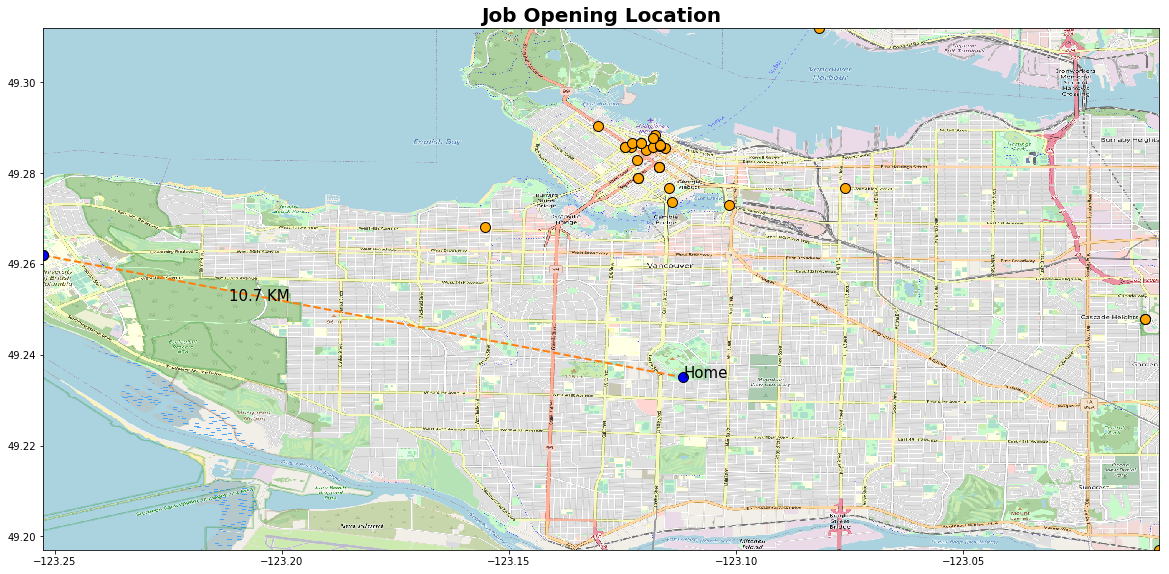

In [22]:
fig, ax = plt.subplots(figsize = (20,10))

plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(van_m,zorder=0, extent = BBox)
plt.plot(map_df.Longitude,map_df.Latitude,linestyle='none',marker='o', 
         markerfacecolor='orange', markersize=10, markeredgecolor="black")

# 49.235000, -123.111610 Home Coordinate
x = [max_lat,49.235000] 
y = [max_lon,-123.111610] 

plt.plot(y, x, linestyle='--',marker='o', markerfacecolor='blue', markeredgecolor="black", markersize=10, linewidth=2) 
ax.text(-123.211610,49.252000,max_dis, fontsize=15)
ax.text(-123.111610,49.235000,"Home", fontsize=15)
plt.title("Job Opening Location",fontsize=20,fontweight='bold')
plt.savefig("C:\\Users\\Owner\\Downloads\\College\\Practice\\Job Hunt\\job_map.png")
plt.show()


### Cover Letter

In [23]:
colors = ['lightslategray',] * 5
colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
        x=[i for i in df['Cover Letter'].unique()],
        y=[i for i in df.groupby('Cover Letter')['ID'].count()],  
marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Cover Letter')

### Responsibilities

In [28]:
# Convert to string
df['Responsibilities'] = df['Responsibilities'].astype(str)
# Convert text to lower case
df['Responsibilities'] = df['Responsibilities'].apply(lambda x: x.lower())
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+")
# Apply the tokenizer to each row of the responsibility
responsiblity_tokens  = df['Responsibilities'].apply(tokenizer.tokenize)

In [29]:
# Import the English stopwords directory 
#stop.extend(["years", "nan","strong","knowledge","using","etc","skills","ability","environment"])
# Removing stopwords from the tokens
responsiblity_tokens = responsiblity_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the responsibility 
all_responsibility = responsiblity_tokens.astype(str).str.cat()
cleaned_responsibility = tokenizer.tokenize(all_responsibility)

In [73]:
# Get the frequency distribution of individual words in the responsibility
fd = FreqDist()
for word in cleaned_responsibility:
    fd[word] += 1
    
# Extracting word >2 letters 
mc = sorted([w for w in fd.most_common(30) if len(w[0]) > 2], key=lambda x: x[1],reverse=True)

In [74]:
responsibility_list=[w[0] for w in mc]

In [75]:
print(responsibility_list)

['data', 'business', 'requirements', 'develop', 'analysis', 'work', 'product', 'team', 'customer', 'research', 'ensure', 'use', 'support', 'development', 'management', 'design', 'needs', 'teams', 'identify', 'reports', 'sources', 'analyze', 'stakeholders', 'customers', 'assist', 'new', 'associations', 'key', 'information', 'including']


In [76]:
#Finding overlap in both the skills and responsibilities
overlap_skill_responsibility = [name for name in skills_list if name in responsibility_list]

In [77]:
overlap_skill_responsibility

skills_only_list = [name for name in skills_list if name not in list(responsibility_list)]
responsibility_only_list = [name for name in responsibility_list if name not in list(skills_list)]

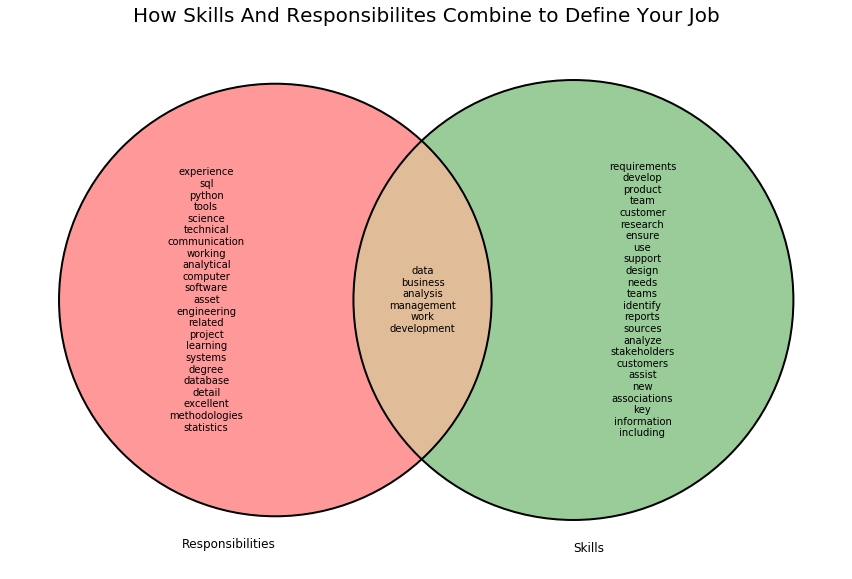

In [83]:
fig, ax = plt.subplots(figsize = (22,10))
ax.set_title('How Skills And Responsibilites Combine to Define Your Job', fontsize=20)
v = venn2([set(skills_list),set(responsibility_list)], 
          set_labels=['Responsibilities', 'Skills'])
v.get_label_by_id('10').set_text('\n'.join(skills_only_list))
v.get_label_by_id('01').set_text('\n'.join(responsibility_only_list))
v.get_label_by_id('11').set_text('\n'.join(overlap_skill_responsibility))
c = venn2_circles([set(skills_list), set(responsibility_list)], 
                  linestyle='solid')
#plt.savefig('images/name_venn.png')

Text(0.5, 1.0, 'How Skills And Responsibilites Combine to Define Your Job')

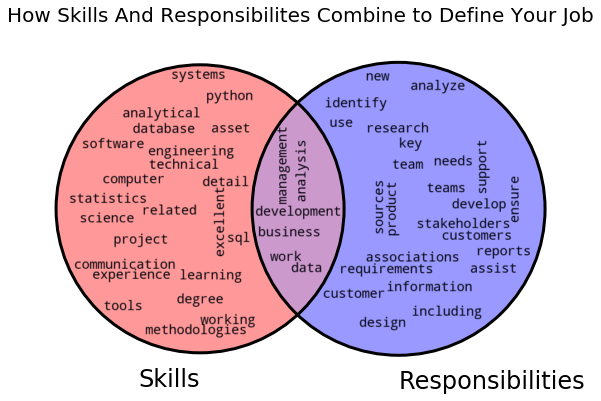

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
v = venn2_wordcloud([set(skills_list),set(responsibility_list)], 
                ax=ax, set_labels=['Skills', 'Responsibilities'])

# add color
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)


ax.set_title('How Skills And Responsibilites Combine to Define Your Job', fontsize=20)